(0.0, 20000.0)

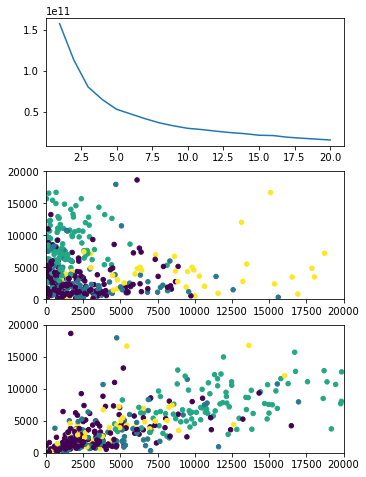

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

file_path = '/Users/tengyaolong/Desktop/Anaconda stuff/Learning/Wholesale_customers_data.csv'
data = pd.read_csv(file_path)

data_standardized = (data-data.mean())/data.std()

ideal_kmeans = []

for i in range(1,21):
    est_kmeans = KMeans(n_clusters=i, random_state=0)
    est_kmeans.fit(data)
    
    ideal_kmeans.append([i, est_kmeans.inertia_])
    

est_kmeans = KMeans(n_clusters=6, random_state=0)
est_kmeans.fit(data_standardized)
est_pred = est_kmeans.predict(data_standardized)


ideal_kmeans = np.array(ideal_kmeans)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharey='row', figsize=(16/3,8))

ax1.plot(ideal_kmeans[:,0], ideal_kmeans[:,1])

ax2.scatter(data.iloc[:,5], data.iloc[:,3], c=est_pred, s=20)
ax2.set_ylim([0,20000])
ax2.set_xlim([0,20000])
ax3.scatter(data.iloc[:,4], data.iloc[:,3], c=est_pred, s=20)
ax3.set_ylim([0,20000])
ax3.set_xlim([0,20000])


In [95]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(0.0, 20000.0)

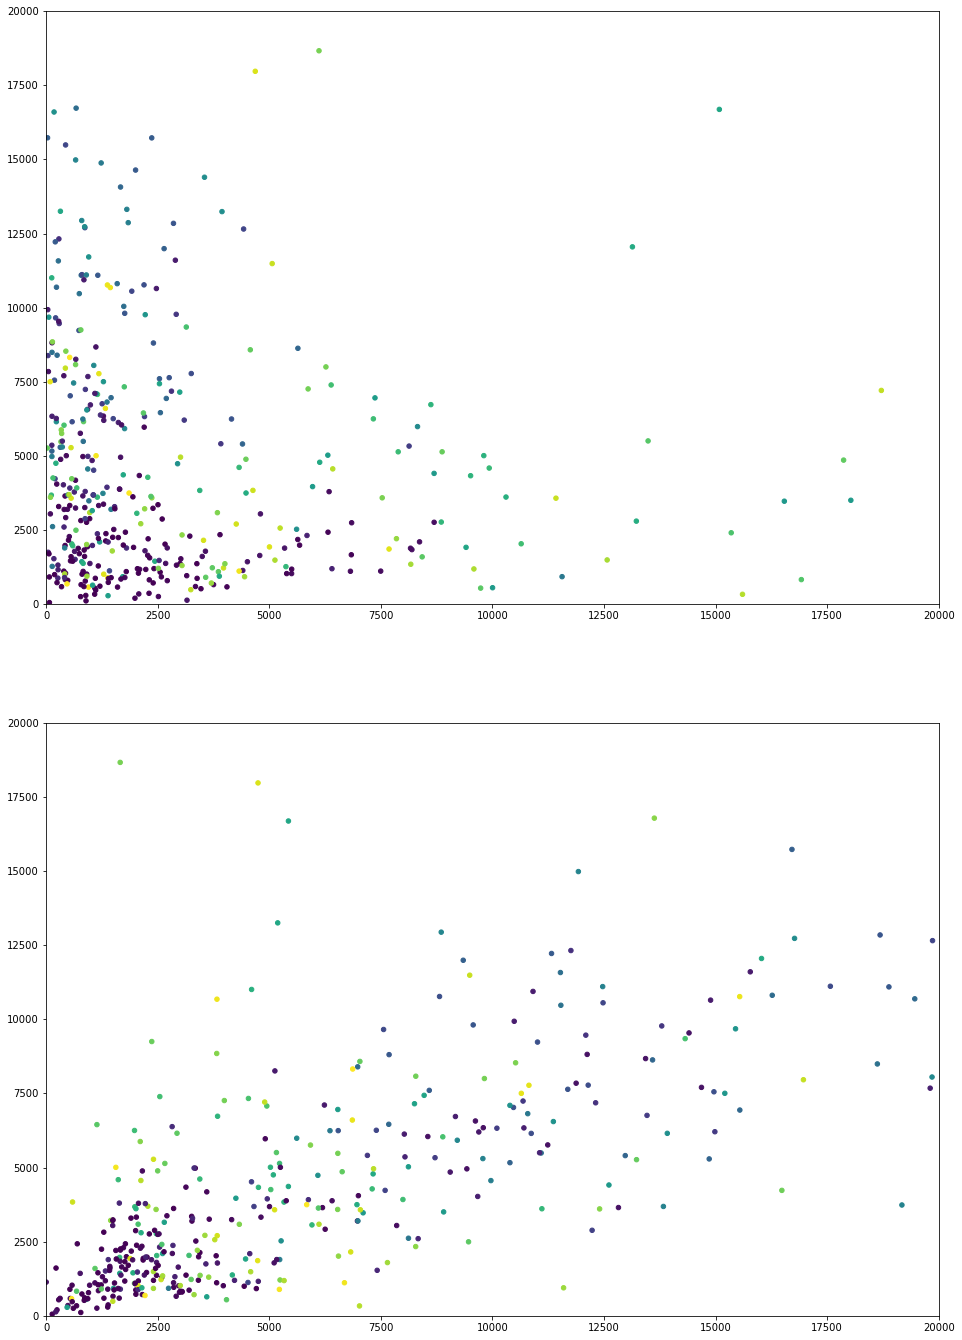

In [96]:
from sklearn.cluster import MeanShift

est_meanshift = MeanShift(bandwidth=0.4)
est_meanshift.fit(data_standardized)
est_predict = est_meanshift.predict(data_standardized)

fig, (ax2, ax3) = plt.subplots(nrows=2, ncols=1, sharey='row', figsize=(16,24))



ax2.scatter(data.iloc[:,5], data.iloc[:,3], c=est_predict, s=20)
ax2.set_ylim([0,20000])
ax2.set_xlim([0,20000])
ax3.scatter(data.iloc[:,4], data.iloc[:,3], c=est_predict, s=20)
ax3.set_ylim([0,20000])
ax3.set_xlim([0,20000])

(0.0, 20000.0)

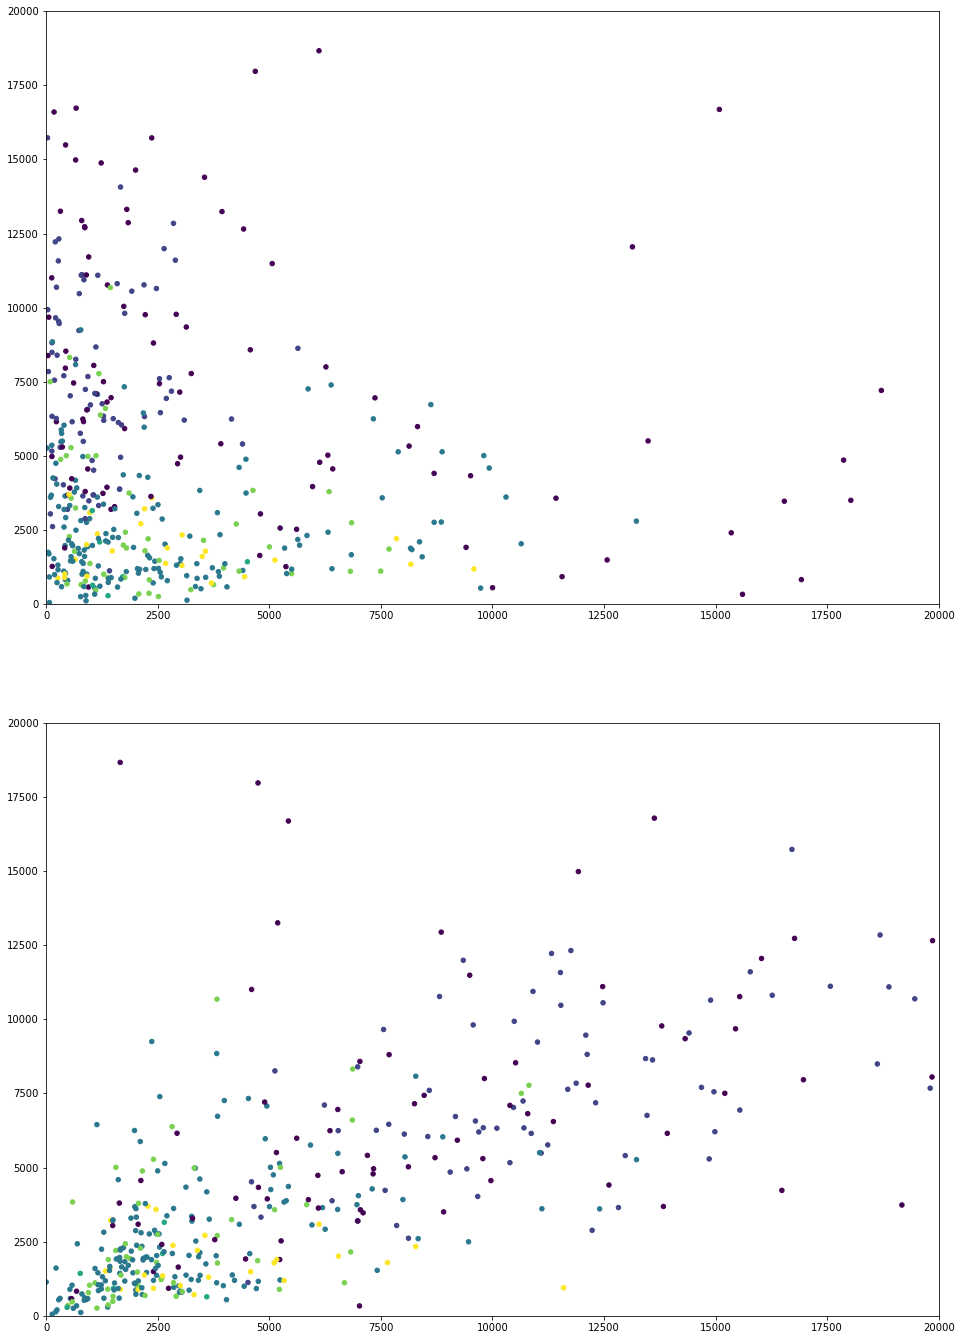

In [97]:
from sklearn.cluster import DBSCAN

est_DBSCAN = DBSCAN(0.8)
estimated_pred = est_DBSCAN.fit_predict(data_standardized)

fig, (ax2, ax3) = plt.subplots(nrows=2, ncols=1, sharey='row', figsize=(16,24))
ax2.scatter(data.iloc[:,5], data.iloc[:,3], c=estimated_pred, s=20)
ax2.set_ylim([0,20000])
ax2.set_xlim([0,20000])
ax3.scatter(data.iloc[:,4], data.iloc[:,3], c=estimated_pred, s=20)
ax3.set_ylim([0,20000])
ax3.set_xlim([0,20000])

In [98]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

kmeans_score = silhouette_score(data_standardized, est_pred, metric='euclidean')
meanshiftscore = silhouette_score(data_standardized, est_predict, metric='euclidean')
DBSCANscore = silhouette_score(data_standardized, estimated_pred, metric='euclidean')

print("Silhouette Coefficient:\n", kmeans_score,'\n', meanshiftscore,'\n', DBSCANscore)




Silhouette Coefficient:
 0.35372758942528437 
 0.09334580346864552 
 0.16856375605964777


In [99]:
print(est_pred)

[3 3 3 0 3 3 3 3 0 3 3 3 3 3 3 0 3 0 3 0 3 0 5 1 3 3 0 0 3 5 0 0 0 5 0 3 5
 3 3 5 5 0 3 3 3 3 3 1 3 3 0 0 5 3 0 0 1 3 0 0 3 1 3 3 0 1 0 3 0 0 5 5 0 3
 3 0 0 3 0 0 0 3 3 0 3 1 1 5 0 0 0 0 1 5 3 0 3 0 0 0 3 3 3 5 0 0 3 3 3 3 0
 3 5 0 0 0 0 0 0 0 0 0 0 3 5 5 0 3 0 5 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 3 0 0
 0 0 0 0 0 0 0 3 3 0 3 3 3 0 0 3 3 3 3 0 0 0 3 3 0 3 0 3 5 0 0 0 0 5 0 4 0
 0 0 0 3 3 0 0 0 3 0 0 5 3 2 2 3 3 2 2 2 3 2 2 2 3 2 1 2 2 3 2 3 2 3 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 3 2 2 2 2 2 1 2 2 2 2 2 2 5
 5 2 2 2 2 3 2 3 2 3 2 2 2 2 5 0 0 5 5 0 3 0 3 5 5 5 5 0 0 0 5 0 0 0 3 2 3
 2 3 3 2 3 3 3 3 3 3 3 2 2 3 2 2 3 2 2 3 2 2 2 3 2 2 2 2 2 5 2 2 2 2 2 3 2
 1 5 3 2 2 2 2 3 3 0 3 0 0 3 3 0 3 0 3 0 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0
 5 0 0 3 0 0 3 5 0 3 0 5 5 0 0 0 0 0 0 0 0 0 0 5 0 0 3 0 0 0 0 5 0 0 0 0 5
 3 3 0 0 0 0 5 0 3 3 0 3 0 0 3 0 3 3 5 0 5 0 0 0 5 0 0 0 5 5 3 0 0]


In [101]:
kmeans_score = calinski_harabasz_score(data_standardized, est_pred)
meanshiftscore = calinski_harabasz_score(data_standardized, est_predict)
DBSCANscore = calinski_harabasz_score(data_standardized, estimated_pred)

print("Calinski Harabasz score:\n", kmeans_score,'\n', meanshiftscore,'\n', DBSCANscore)

Calinski Harabasz score:
 145.603317517436 
 112.90534400805588 
 42.451149555696894
